In [26]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
iris_path = r"/home/bubblebeth/GitHub/Neurociencias-2025-2/S03_datasets/iris/iris.csv"
df = pd.read_csv(iris_path)

In [28]:
df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<AxesSubplot: xlabel='Petal.Length', ylabel='Sepal.Length'>

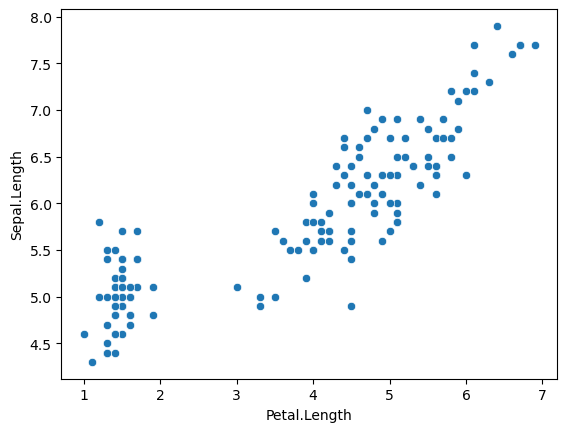

In [29]:
sns.scatterplot(data = df, x = 'Petal.Length', y = 'Sepal.Length')
# Aqui podemos ver que se distinguen dos grupos == Usaremos Kmeans

### kmeans
Kmeans es una tecnica de machine learning para cuando tienes un conjunto de datos con cierto comportamiento o tendencia. Si tu tienes un monton de datos que no sabes si pertenecen algo particular (un grupo o rubro) kmeans lo que hara sera ayudarnos a dividir esos datos en distintos grupos por algunas similitudes que puedan compartir. Estas divisiones pueden signoficar mucho o nada. Por eso vienen estas preguntas:

    Con cuantos clusters me quedo?
    Este modelos es descriptivo o tambien puede ser predictivo?

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [31]:
# Seleccionamos datos de interes
X = df.iloc[:, :-1]
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
# Normalizamos la data
X_std = StandardScaler().fit_transform(X)
X_std

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### ENCONTRAR CLUSTERS POR KMEANS

In [33]:
# Aplicando kmeans
kmeans = KMeans(n_clusters=3, tol = 0.000001, n_init='auto')
kmeans.fit(X_std)

KMeans(n_clusters=3, n_init='auto', tol=1e-06)

### CARACTERISTICAS DE KMEANS

In [34]:
KMeans(n_clusters=3)

KMeans(n_clusters=3)

In [35]:
kmeans.cluster_centers_

array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [36]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [37]:
kmeans.inertia_

139.82049635974974

In [38]:
kmeans.n_iter_

3

### CREACION DE DATAFRAME

In [39]:
df_std = pd.DataFrame(data = X_std, columns = df.columns[:-1])
df_std['kmeans'] = kmeans.labels_ # Aqui agregamos las etiquetas de kmeans en un quinta columna
df_std

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,kmeans
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,1
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,1
148,0.432165,0.788808,0.933271,1.448832,1


<AxesSubplot: xlabel='Petal.Length', ylabel='Sepal.Length'>

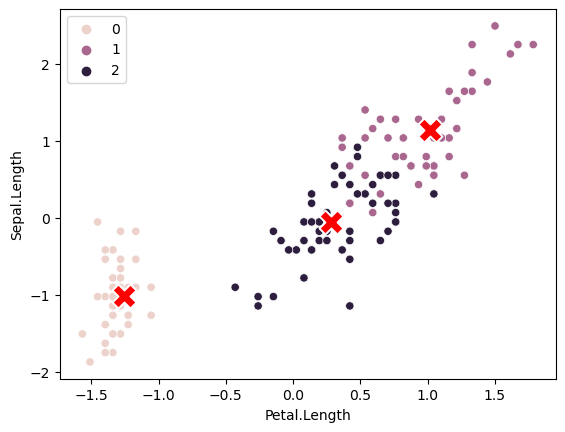

In [40]:
sns.scatterplot(data = df_std, x = 'Petal.Length', y = 'Sepal.Length', hue = 'kmeans')
sns.scatterplot(x = kmeans.cluster_centers_[:, 3], y = kmeans.cluster_centers_[:,0],
               marker = "X", color = 'r', s = 300)

### METODO DEL CODO
Vamos de manera iterada calcular la inercia o error para diferentes cantidades de clusters

In [47]:
inertia = []
for no_clusters in range(2, 15):
    kmeans = KMeans(n_clusters = no_clusters, n_init='auto')
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'METODO DEL CODO')

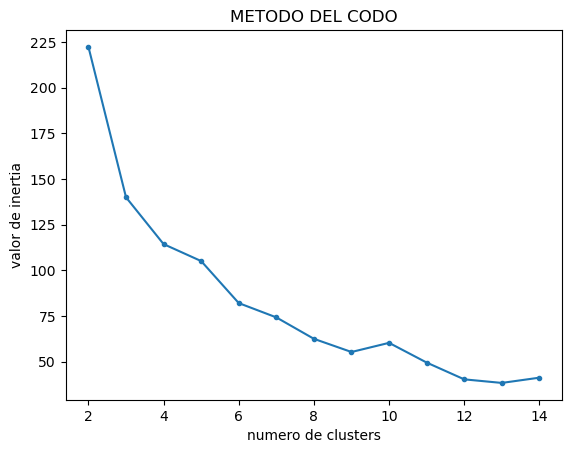

In [48]:
plt.plot(range(2,15), inertia, '.-')
plt.xlabel('numero de clusters')
plt.ylabel('valor de inertia')
plt.title('METODO DEL CODO')

### Si tenemos multiples puntos de inflexion del codo tenemos que analizar 

##### Calculo kmeans
no_clusters = 3
kmeans = KMeans(n_clusters = no_clusters, n_init='auto')
kmeans.fit(X_std)

# Construyendo dataframe
df_std = pd.DataFrame(data = X_std, columns = df.columns[:-1])
df_std['kmeans'] = kmeans.labels_

# Ploteo
sns.scatterplot(data = df_std, x = 'Petal.Length', y = 'Sepal.Length', hue = 'kmeans')
sns.scatterplot(x = kmeans.cluster_centers_[:, 3], y = kmeans.cluster_centers_[:,0],
               marker = "X", color = 'r', s = 300)

<AxesSubplot: xlabel='Petal.Length', ylabel='Sepal.Length'>

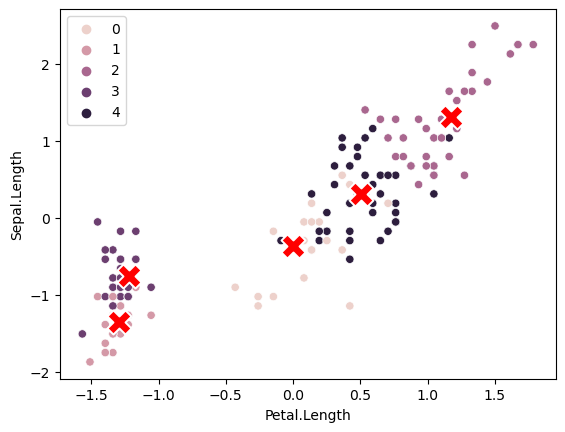

In [18]:
# Calculo kmeans
no_clusters = 5
kmeans = KMeans(n_clusters = no_clusters, n_init='auto')
kmeans.fit(X_std)

# Construyendo dataframe
df_std = pd.DataFrame(data = X_std, columns = df.columns[:-1])
df_std['kmeans'] = kmeans.labels_

# Ploteo
sns.scatterplot(data = df_std, x = 'Petal.Length', y = 'Sepal.Length', hue = 'kmeans')
sns.scatterplot(x = kmeans.cluster_centers_[:, 3], y = kmeans.cluster_centers_[:,0],
               marker = "X", color = 'r', s = 300)

### DATOS DE ENTRADA
  n_clusters = numero de grupos que consideramos seria bueno dividir.
  
  max_iter = maximo de iteraciones, numero default.
  
  init = donde se localizan estos centroides, el algoritmo iterativamente los va a ir acercando al centro de cada grupo.
  
  tol = tolerancia que tenemos para nuestro error (default = 0.0001).

### DATOS DE SALIDA
  Donde se ubicaron esos centros.
  
  Arreglo de las etiquetas, etiqueta cada punto dependiendo el grupo al que pertenece.
  
  El valor de nuestro error con el que vamos a ver que tan buena fueron nuestros centroides.
  
  Cuantas iteraciones necesito para llegar al centro de nuestros grupos.

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [23]:
gm = GaussianMixture(n_components=3, random_state=0).fit(X_std)

In [24]:
labels = gm.predict(X_std)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0.5, 1.0, 'Método de Gaussian mixture')

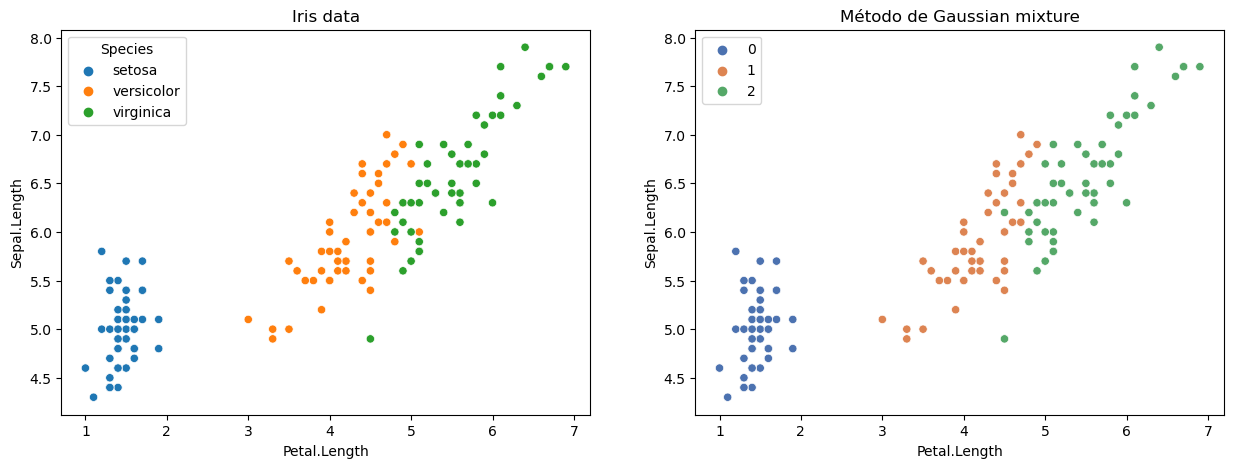

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue='Species', ax=axes[0]).set_title('Iris data')

sns.scatterplot(data=df, x='Petal.Length', y = 'Sepal.Length', 
                hue=labels, palette='deep', ax=axes[1]).set_title('Método de Gaussian mixture')

## CLUSTERING JERARQUICO

In [ ]:
from scipy.

In [ ]:
revisar distacia taxista y distancia euclidiana, 